<a href="https://colab.research.google.com/github/Alika443/Alika443/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

df = pd.read_csv("Steel_industry_data.csv")

In [ ]:
# используемые киловатт/час
# запаздывающий реактивный ток, киловар/час
# реактивная мощность опережающего тока, киловар/час
# углекислый газ
# запаздывающий коэффициент мощности по току
# ведущий коэффициент мощности по току
# основная ценность продукта
# статус дня (будний, выходной)
# день недели
# тип нагрузки

In [2]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [3]:
df.shape

(35040, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [6]:
df.describe().round(2)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.00,35040.00,35040.00,35040.00,35040.00,35040.00,35040.00
mean,27.39,13.04,3.87,0.01,80.58,84.37,42750.00
std,33.44,16.31,7.42,0.02,18.92,30.46,24940.53
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.20,2.30,0.00,0.00,63.32,99.70,21375.00
50%,4.57,5.00,0.00,0.00,87.96,100.00,42750.00
75%,51.24,22.64,2.09,0.02,99.02,100.00,64125.00
max,157.18,96.91,27.76,0.07,100.00,100.00,85500.00


In [7]:
#Группировка данных по дням недели для более простого и эффективного построения трендов.
grouped = df.groupby('Day_of_week').mean(numeric_only=True)
grouped

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Day_of_week,,,,,,,
Friday,33.195014,16.103950,2.618966,0.014339,79.848419,90.817939,42750.0
Monday,33.143935,16.106470,2.541812,0.014324,79.618194,90.648001,42750.0
Saturday,15.919020,6.309886,6.208910,0.006140,82.226583,74.348349,42750.0
Sunday,7.545633,3.235633,7.659093,0.002045,82.171675,64.022626,42750.0
Thursday,35.112083,17.356707,2.367344,0.015294,79.561917,91.823678,42750.0
Tuesday,34.427614,16.610397,2.509335,0.014587,80.080509,90.841769,42750.0
Wednesday,32.254235,15.465583,3.216741,0.013886,80.557556,87.951955,42750.0


In [10]:
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Запаздывающая реактивная мощность, киловар/час',
                        'Leading_Current_Reactive_Power_kVarh': 'Ведущая реактивная мощность, киловар/час',
                        'Lagging_Current_Power_Factor': 'Запаздывающий коэффициент мощности',
                        'Leading_Current_Power_Factor': 'Ведущий коэффициент мощности',
                        'CO2(tCO2)':'CO2'})
df.head()

,date,Usage_kWh,"Запаздывающая реактивная мощность, киловар/час","Ведущая реактивная мощность, киловар/час",CO2,Запаздывающий коэффициент мощности,Ведущий коэффициент мощности,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


<ipython-input-12-18f0a4179771>:7: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corrwith(y).plot.bar(


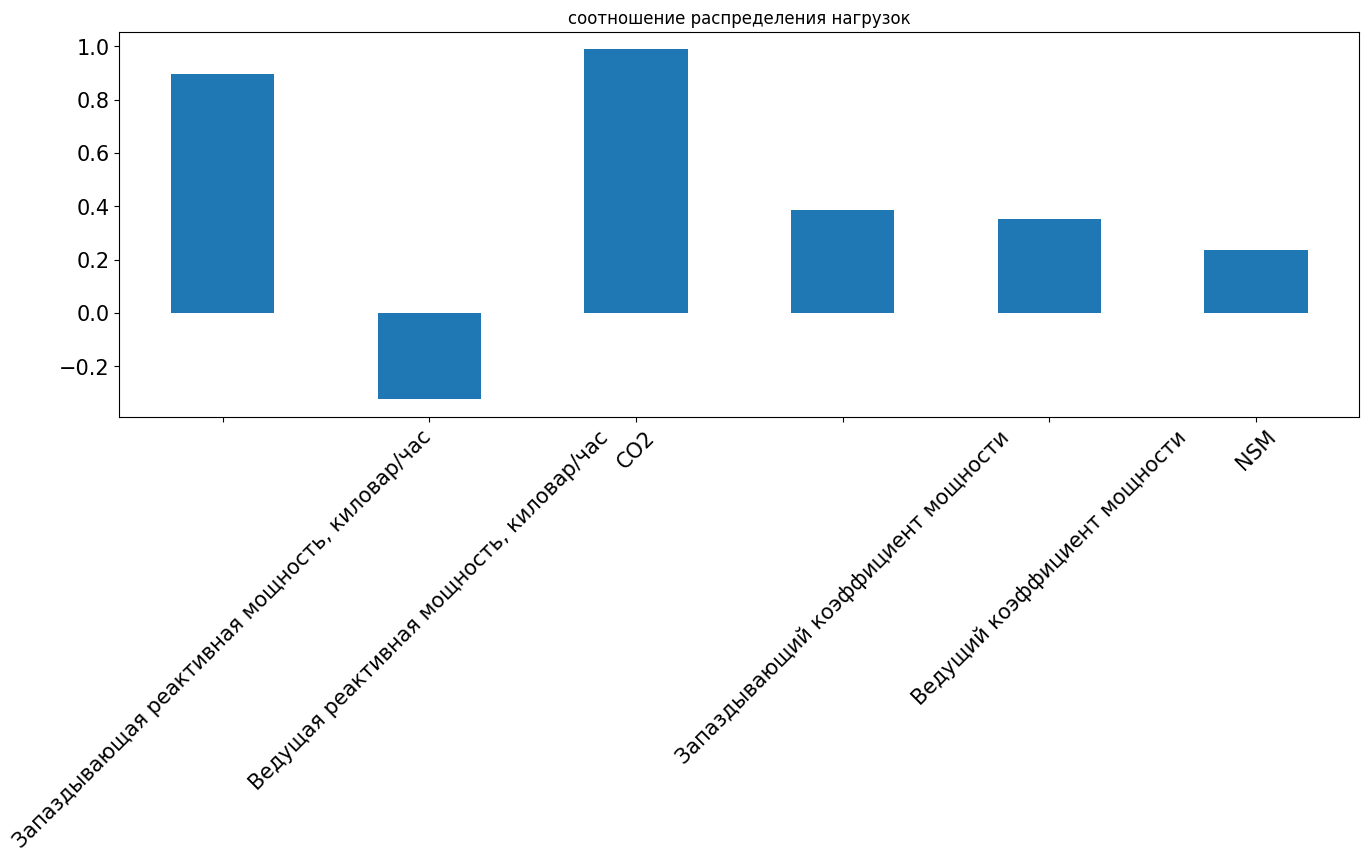

In [12]:
# соотношение распределения нагрузок
df1 = df.copy()

X = df1.drop(['Usage_kWh'],axis=1)
y = df1['Usage_kWh']

X.corrwith(y).plot.bar(
        figsize = (16, 5), title = "соотношение распределения нагрузок", fontsize = 15,
        rot = 45, grid = False)
plt.show()

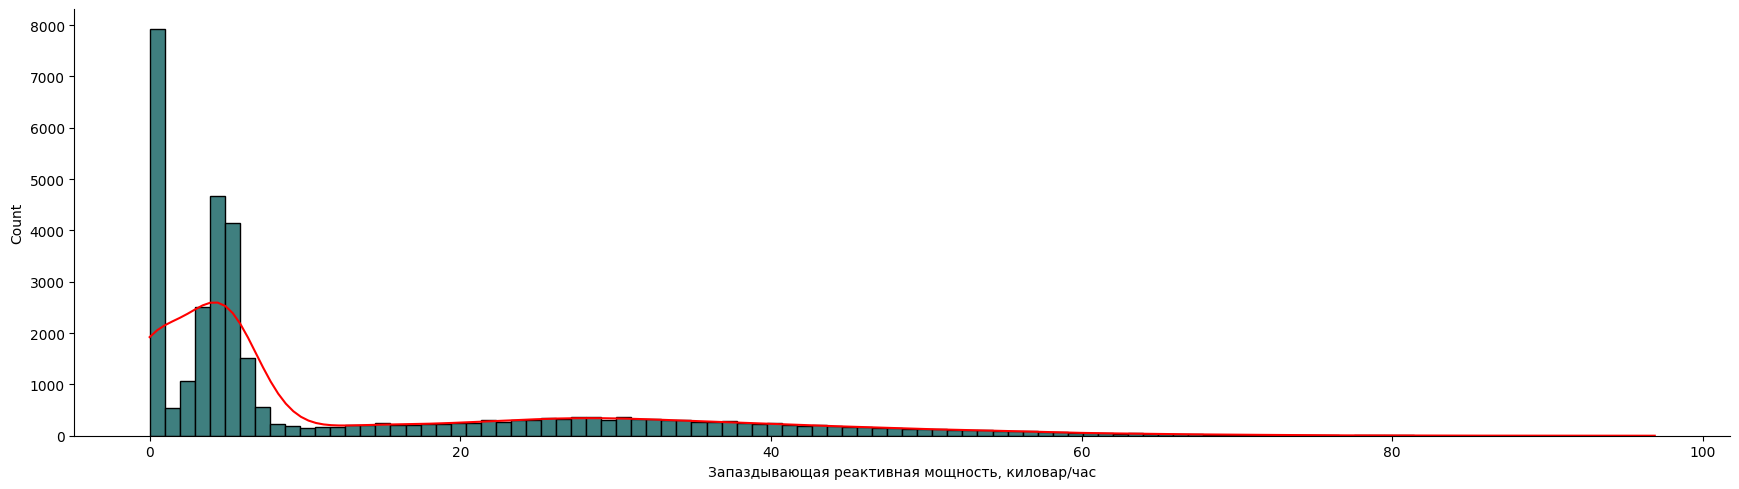

In [13]:
sns.displot(data=df, x="Запаздывающая реактивная мощность, киловар/час", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);